# Logistic Regression

In this notebook, we'll build a Binary Logistic regression model

# Intution

**What is Logistic Regression - Qualitative Dependent Variable**
* Probability to Sigmoid Curve (Cumulative Curve) - Logit function https://en.wikipedia.org/wiki/Sigmoid_function
* **Assumption of logistic Regression** -
    * Dependent variable has to be categorical (dichotomous for binary logistic regression)
    * P(Y=1) is the probability of occurrence of event
    * Dependent variable is to be coded accordingly
    * For a binary logistic regression, the class 1 of the dependent variable should represent the desired outcome
    * Error terms need to be independent. Logistic regression requires each observation to be independent.
    * Model should have little or no multicollinearity
    * Logistic regression assumes linearity of independent variables and log odds
    * Sample size should be large enough
* **Assumption not required in Logistic Regression** -
    * Linear relationship between the dependent and independent variables is not necessary
    * Error terms (residuals) do not need to be normally distributed
    * Homoscedasticity is not needed
* Odds - Odds ratio for a predictor is defined as the relative amount by which the odds of the outcome increase
    (Odds Ratio > 1) or decrease (Odds Ratio < 1) when the value of the predictor variable is increased by 1 unit 
    for a given predictor = (P/1-p) x =1 / p(/1-p) x=0 
    * What happens when Odds Ratio > 1 -
        * X is Categorical - Relative probability of event to non-event is higher when X1 is present vis-à-vis when X1 is absent 
        * X is Continuous - Relative probability of event to non-event is higher when X1 increases 
    * What happens when Odds Ratio < 1 -
         * X is Categorical - Relative probability of event to non-event is lower when X1 is present vis-à-vis when X1 is absent 
        * X is Continuous - Relative probability of event to non-event is lower when X1 increases
    * What happens when Odds Ratio = 1 - ??    
* MLE -  MLE is a statistical method for estimating the coefficients of a model.
     * The likelihood function (L) measures the probability of observing the particular set of dependent variable values 
         (p1 , p2, ..., pn) that occur in the sample: **L = Prob (p1, p2...pn) - Likelyhood function**
     * The higher the L, the higher the probability of observing the ps in the sampl 
* Log of Odds - To make the function linear we take log both sides
* Model Building - Refer to below notebook
* Output Interpretation - Refer to the results
* Model Evaluation -
    * Senstivity & Specificity -
    * ROC Curve - 
    * Confusion Matrix -
* Variable Transformation     

# Regression Model Building Steps
* Reading and Understanding the Data
* EDA
    * Missing Value Treatment
    * Outlier Treatment
    * Univariate Analysis
        * Descriptive Statistics
            * Mean/Median/Mode/Skewness
            * Transformations
    * Multivariate Analysis
        * Correlations
        * Box Plots
        * Chi-square Test to understand the relationship between two categorical variables
* Encoding 
    * Target Variable Encoding - for Y variable
    * Dummy variable Encoding - for X variables
* Scaling - for numerical variables
* Feature Selection 
    * RFE
* Base Model Building - First Model building in python
* Regression Model Assumptions - Validation
* Final Model Building
* Results Interpretation
* Submission

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

## Package Load

In [2]:
import sys, os, traceback
import pyodbc as pyodbc
#import ConfigParser
import pandas as pd
import numpy as np
#from ggplot import *
#%autosave 0
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from pandas.tseries.offsets import MonthEnd
from IPython.display import Image
from IPython.core.display import HTML 

## Reading Data

In [96]:
data= pd.read_csv('raw_data.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Step 2: Exploratory Data Analysis - EDA

## Descriptive Statistics 

In [97]:
data.iloc[:,:-1].describe()  # Removing target column

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values

## Check for Duplicate records

In [98]:
# Check for duplicate data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
24769,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25634,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
28143,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
29352,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
29936,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,1
34333,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37154,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
39423,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0


We can clearly see that there are duplicate records in the data set. We need to remove them 

In [99]:
data = data.drop_duplicates() 
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null 

# Missing Values

In [101]:
missing_data = data.isnull().sum()
# missing_data_per = missing_data*100/len(data) 
# missing_data_per
missing_data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No missing values in the data so need to adjust anything on the data

# Y variable (Target Variable Analysis)

In [102]:
data['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [103]:
data['y'].value_counts(normalize=True)

0    0.887337
1    0.112663
Name: y, dtype: float64

11% event rate

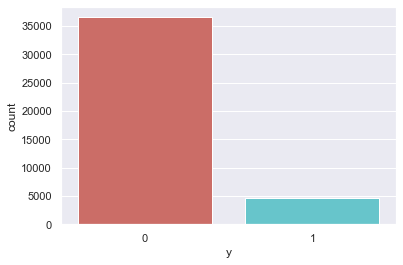

In [104]:
sns.countplot(x= 'y',data=data,palette ='hls')
plt.show()

In [105]:
data.groupby('y').mean() # Average of term deposit subscribed v/s non-subscribed variable

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
1,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


**Above table gives us the idea how the mean varies for clients who subscribed a term deposit and who did not**

**What are your observations??**



# Numerical Columns - Distribution and Outliers values

### Check the categories within numerical columns

In [106]:
# previous variable
data['pdays'].value_counts()
## Data is skewed towards 999 days in pdays columns

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [107]:
# previous variable
data['previous'].value_counts()
## Data is skewed towards 0 days in pdays columns - we will be considering this as categorical variable

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [108]:
# pdays variable
data['emp_var_rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [109]:
# pdays variable
data['cons_price_idx'].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

In [110]:
# pdays variable
data['cons_conf_idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [111]:
# pdays variable
data['nr_employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

## Numerical Data Types

In [112]:
num_col = data.select_dtypes(include=np.number).columns.tolist()[:-1]
print(num_col)
print(type(num_col))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
<class 'list'>


In [113]:
data_num = data[num_col]
data_num.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


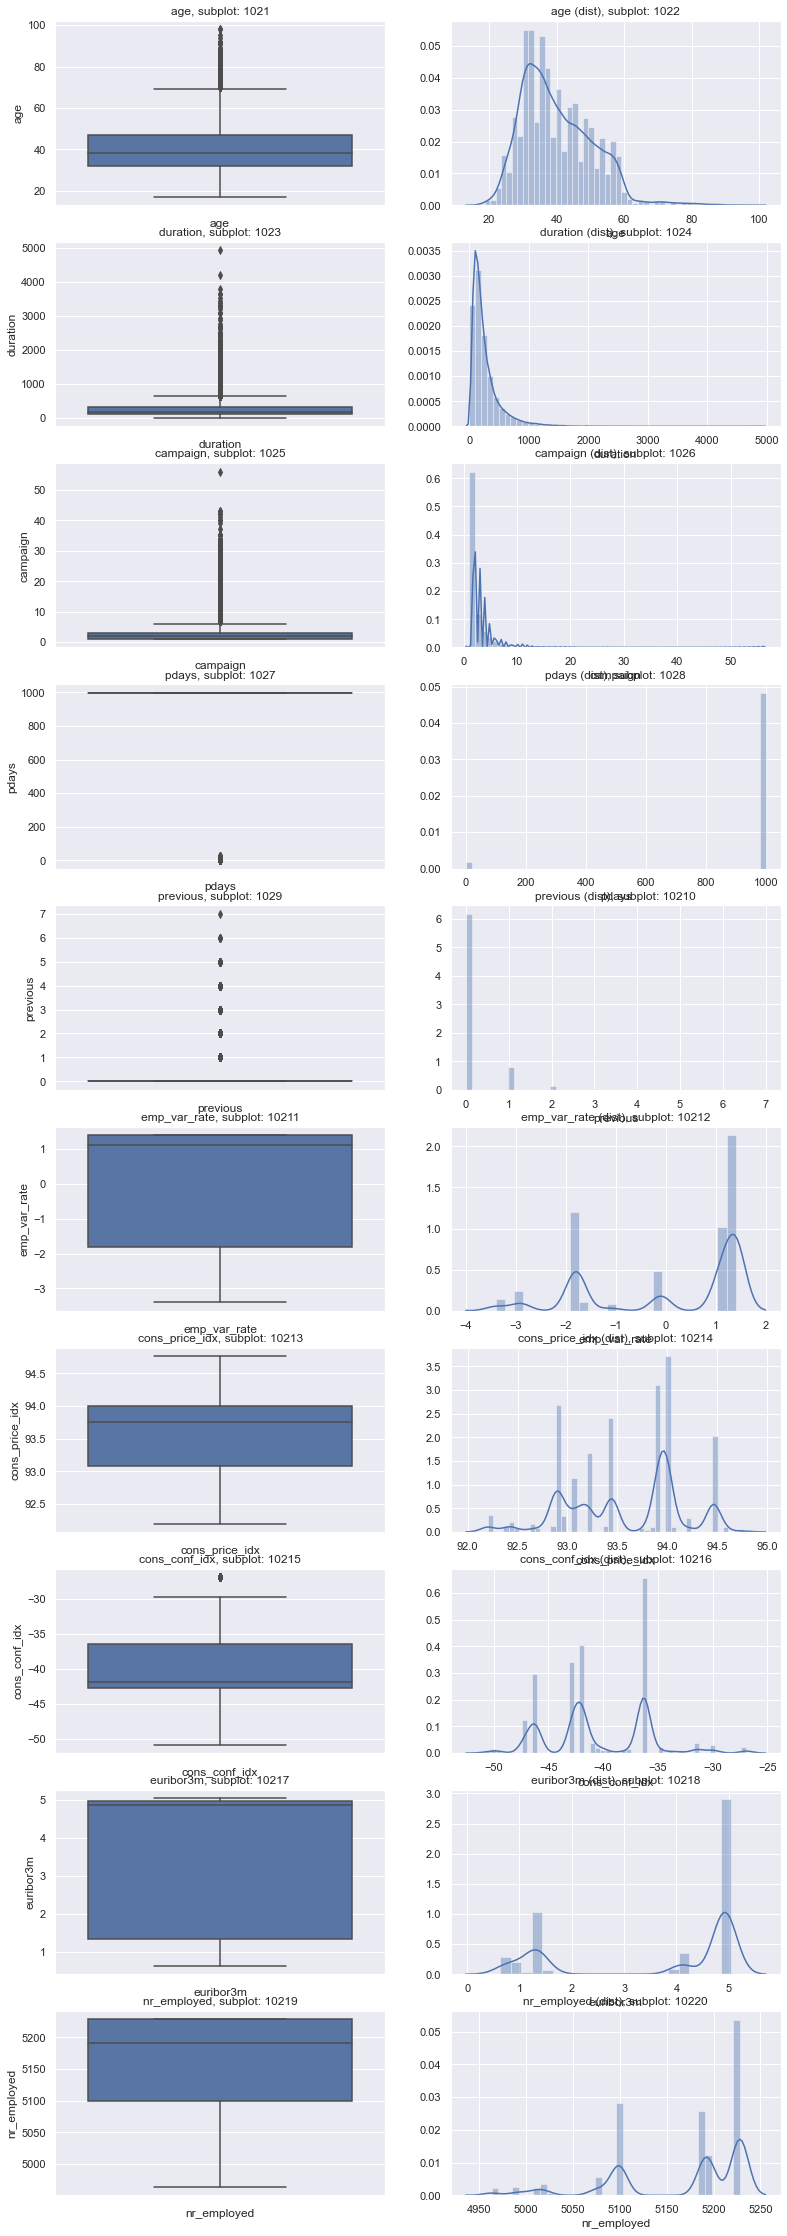

In [21]:
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(13, 40)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data_num[i],orient="v",)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data_num[i])
    c = c + 1
    
plt.show();

**Variables like Age, duration and cons_conf_indx have outliers but the distribution is also right skewed**

## Outlier Treatment

In [114]:
# General Function to remove outlier
def treat_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lri = q1-(1.5*IQR)
    uri = q3 + (1.5*IQR)
    return lri, uri

In [115]:
lri,uri = treat_outlier(data['age'])

In [116]:
data['age']=np.where(data['age']>uri,uri,data['age'])
data['age']=np.where(data['age']<lri,lri,data['age'])

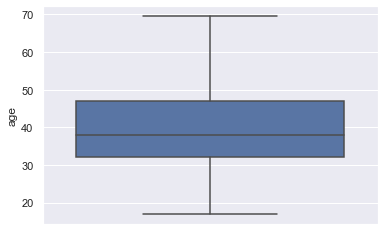

In [117]:
sns.boxplot(data['age'],orient="v",)

In [118]:
lri,uri = treat_outlier(data['duration'])
data['duration']=np.where(data['duration']>uri,uri,data['duration'])
data['duration']=np.where(data['duration']<lri,lri,data['duration'])

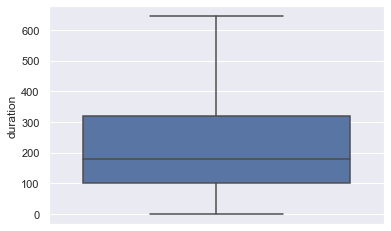

In [119]:
sns.boxplot(data['duration'],orient="v",)

## Correlation 

In [120]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.001993,0.006743,-0.026652,0.015744,0.012335,0.006923,0.126561,0.024153,-0.002228,0.020918
duration,0.001993,1.000000,-0.101239,-0.066864,0.037376,-0.044965,0.001459,-0.006560,-0.052405,-0.068737,0.401306
campaign,0.006743,-0.101239,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.026652,-0.066864,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.015744,0.037376,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp_var_rate,0.012335,-0.044965,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons_price_idx,0.006923,0.001459,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons_conf_idx,0.126561,-0.006560,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.024153,-0.052405,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr_employed,-0.002228,-0.068737,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669


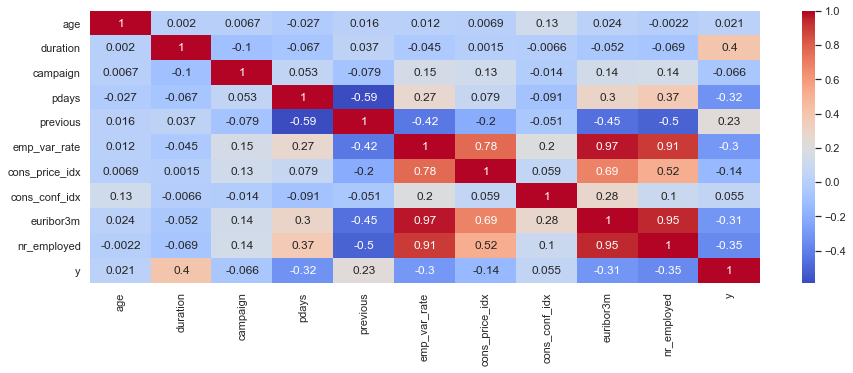

In [121]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

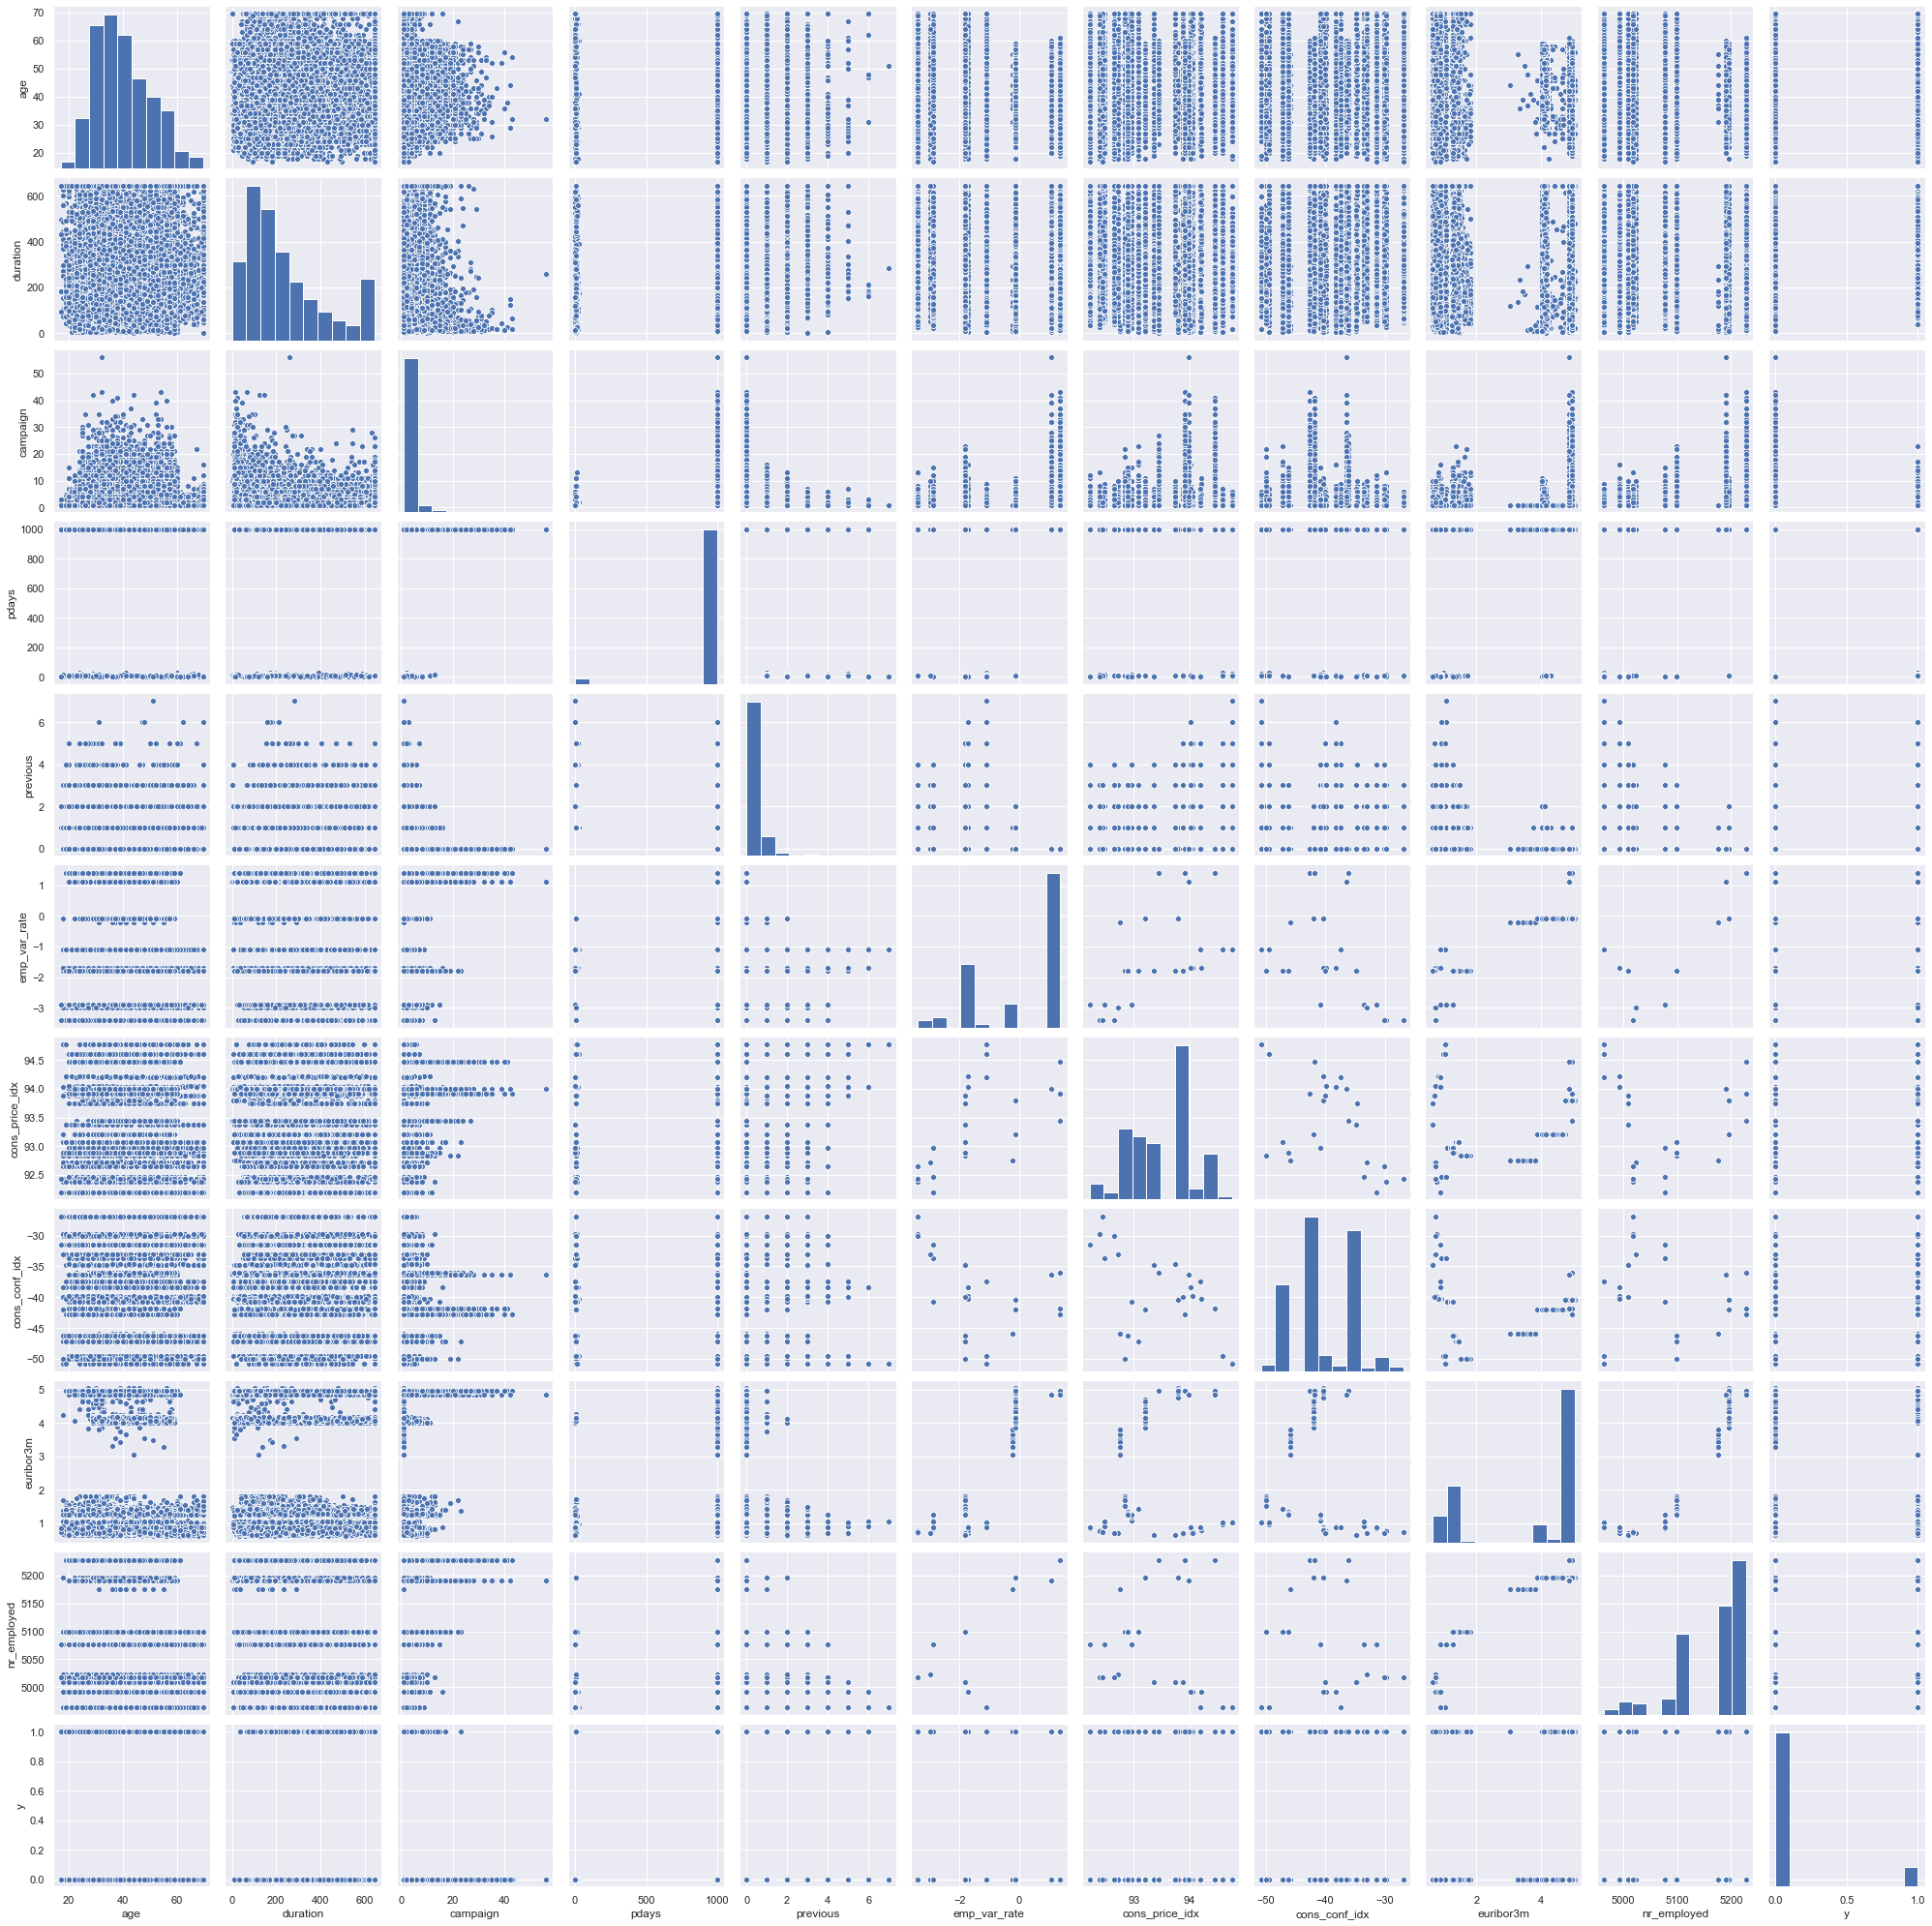

In [30]:
sns.pairplot(data,kind='scatter');

**Can not infer anything specific from pairplot above**

# Categorical Columns

## Univariate Analysis

### Object Types columns

In [122]:
cat_col = data.select_dtypes(include=np.object).columns.tolist()[:-1]
print(cat_col)
print(type(cat_col))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
<class 'list'>


In [123]:
data_cat = data[cat_col]
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu
1,technician,married,unknown,no,no,no,cellular,nov,fri
2,management,single,university.degree,no,yes,no,cellular,jun,thu
3,services,married,high.school,no,no,no,cellular,apr,fri
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri


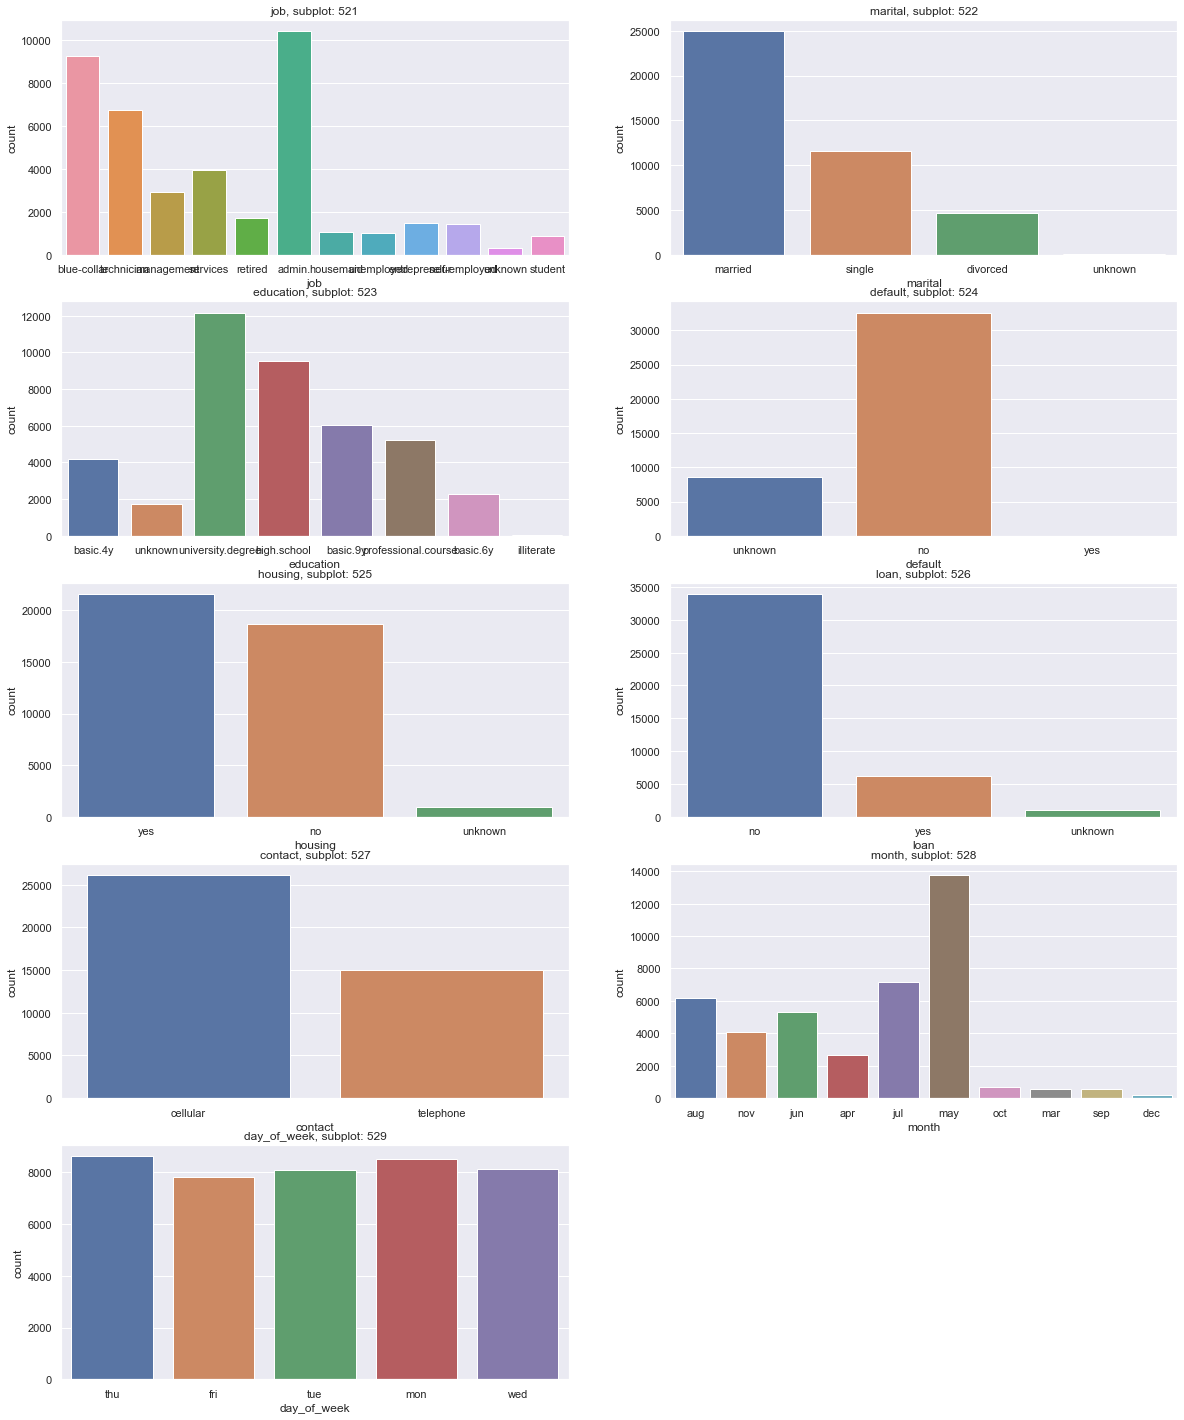

In [124]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(20, 25)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data_cat[i])
    c = c + 1
    
plt.show();

# Bi-Variate Analysis

In [125]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week']

In [126]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.185910,231.135330,2.623572,954.306363,0.189078,0.016028,93.534250,-40.245331,3.550668,5164.136990,0.129667
blue-collar,39.554469,239.395385,2.558630,985.158867,0.122555,0.248903,93.656619,-41.376354,3.771879,5175.613488,0.068951
entrepreneur,41.723214,237.859547,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.295755,229.253302,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.349179,235.195280,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,60.202561,250.137660,2.478463,897.818393,0.327707,-0.697963,93.431084,-38.577474,2.769969,5122.261525,0.252619
self-employed,39.948276,233.738564,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.925637,237.841820,2.588606,979.964457,0.155029,0.175548,93.634848,-41.289892,3.699441,5171.604159,0.081422
student,25.894857,260.377143,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [127]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.614183,233.046411,2.613316,968.633268,0.168727,0.163717,93.606496,-40.706636,3.715333,5170.866233,0.103231
married,42.223867,234.239858,2.573091,967.238754,0.155652,0.183656,93.597440,-40.271012,3.745829,5171.847029,0.101561
single,33.149343,237.185706,2.534244,949.892598,0.211432,-0.167840,93.517363,-40.919068,3.317548,5155.203416,0.140090
unknown,40.275000,279.431250,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [128]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.127275,241.521193,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.412702,237.091227,2.556962,980.360105,0.129201,0.230773,93.649912,-41.129943,3.772470,5174.710956,0.082060
basic.9y,39.026551,237.955335,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.972876,237.094407,2.568860,964.347456,0.185976,0.032843,93.584890,-40.940317,3.556085,5164.988394,0.108389
illiterate,47.916667,235.388889,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.039122,229.760782,2.586832,960.744084,0.163168,0.172309,93.569755,-40.123893,3.709739,5170.122805,0.113550
university.degree,38.847665,230.674408,2.563713,951.792174,0.192453,-0.027425,93.493711,-39.976726,3.530225,5163.248027,0.137208
unknown,43.251445,241.434104,2.597110,942.798266,0.226590,0.058324,93.658465,-39.876185,3.570291,5159.509884,0.145087


**The above help if we need to create more features from our data - feature engineering**

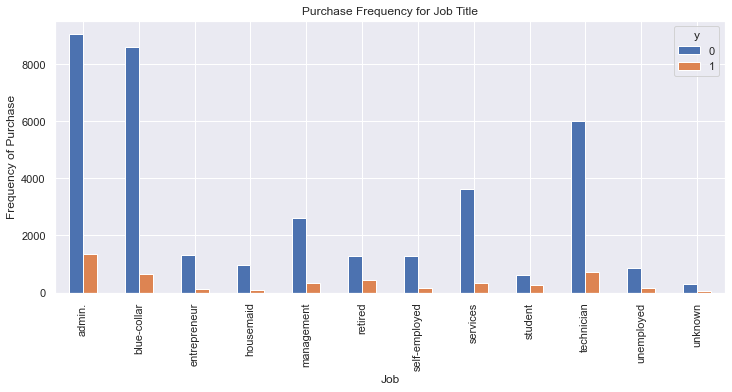

In [129]:
# plt.figure(figsize =(10,10))
pd.crosstab(data.job,data.y).plot(kind='bar',figsize=(12,5))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase');

**The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.**

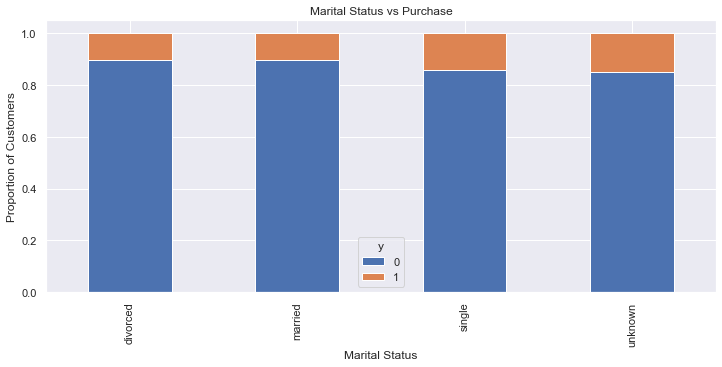

In [42]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(12,5))
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

**The marital status does not seem a strong predictor for the outcome variable.**

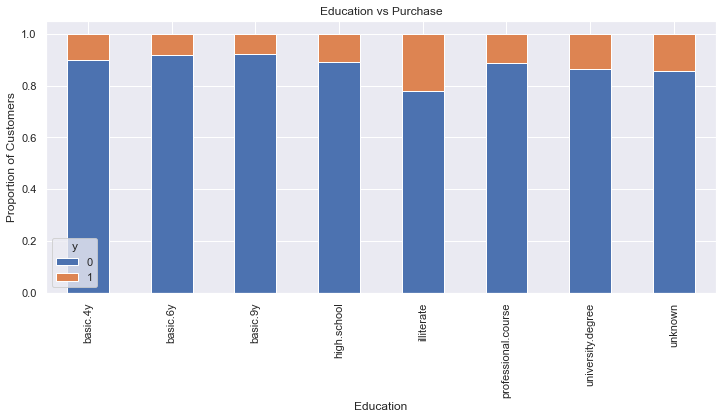

In [43]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize = (12,5))
plt.title('Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

**Education seems a good predictor of the outcome variable.**

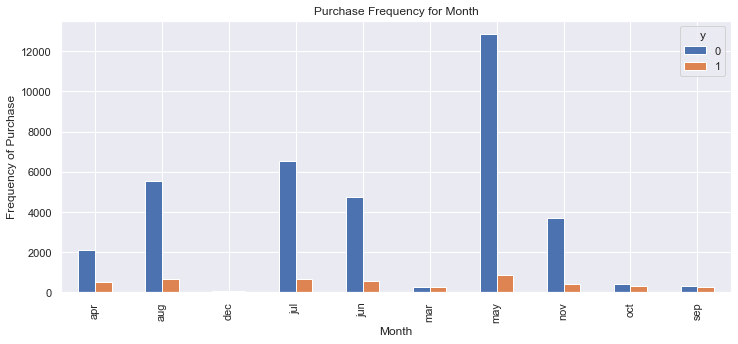

In [44]:
pd.crosstab(data.month,data.y).plot(kind='bar',figsize =(12,5))
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

**Month might be a good predictor of the outcome variable.**

# Multicolinearity - Correlation amongst X- Variables

In [130]:
data_num.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons_price_idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons_conf_idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr_employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


* **Why it can happen:** A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

* **What it will affect:** Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, ***it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant***.

* **How to detect it:** There are a few ways, but we will use a ***heatmap of the correlation*** as a visual aid and examine the ***variance inflation factor (VIF)***

* **How to fix it:** This can be fixed by other removing predictors with a high ***variance inflation factor (VIF)*** or performing dimensionality reduction.
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

***VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.***

**or**

***VIF score of an independent variable represents how well the variable is explained by other independent variables.***

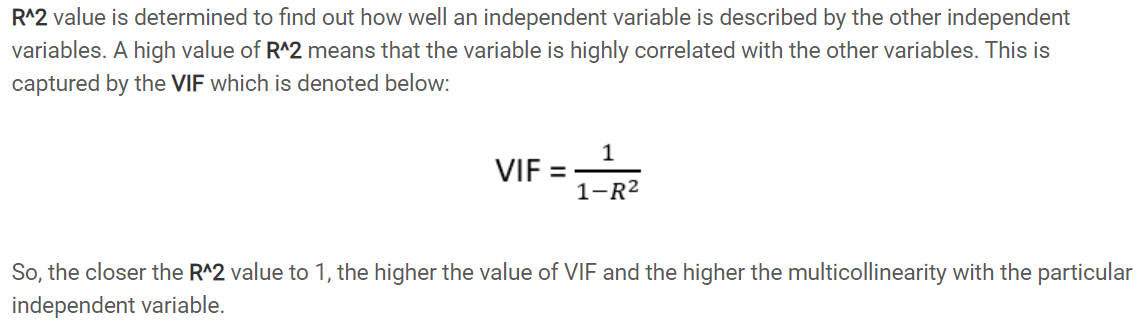

In [50]:
Image("VIF_Image.png")

In [51]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# VIF function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
calc_vif(data_num)

,variables,VIF
0,age,16.047407
1,duration,2.011088
2,campaign,1.921537
3,pdays,44.400563
4,previous,2.001611
5,emp_var_rate,28.906692
6,cons_price_idx,22558.159811
7,cons_conf_idx,120.096263
8,euribor3m,226.220791
9,nr_employed,26743.400836


**VIF goes above 5, you can assume that the regression coefficients are poorly estimated due to multicollinearity**

* **Fixing Multicollinearity:** Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

### Step-1 Removing the variable with the highest vif value

In [54]:
data_num_1 = data_num.drop(['nr_employed'],axis=1)
data_num_1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
0,44,210,1,999,0,1.4,93.444,-36.1,4.963
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869


In [55]:
calc_vif(data_num_1)

,variables,VIF
0,age,16.046778
1,duration,2.009051
2,campaign,1.919349
3,pdays,43.644109
4,previous,1.989064
5,emp_var_rate,19.945751
6,cons_price_idx,300.999189
7,cons_conf_idx,100.914289
8,euribor3m,118.939347


Dropping variables should be an iterative process starting with the variable having the largest VIF value because its trend is highly captured by other variables. If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent.

### Step-2

In [56]:
data_num_2 = data_num_1.drop(['cons_price_idx'],axis=1)
data_num_2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,euribor3m
0,44,210,1,999,0,1.4,-36.1,4.963
1,53,138,1,999,0,-0.1,-42.0,4.021
2,28,339,3,6,2,-1.7,-39.8,0.729
3,39,185,2,999,0,-1.8,-47.1,1.405
4,55,137,1,3,1,-2.9,-31.4,0.869


In [57]:
calc_vif(data_num_2)

,variables,VIF
0,age,14.744323
1,duration,1.993427
2,campaign,1.911334
3,pdays,41.727219
4,previous,1.799826
5,emp_var_rate,10.728783
6,cons_conf_idx,44.856260
7,euribor3m,54.220326


### Step-3

In [58]:
data_num_3 = data_num_2.drop(['euribor3m'],axis=1)
data_num_3.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx
0,44,210,1,999,0,1.4,-36.1
1,53,138,1,999,0,-0.1,-42.0
2,28,339,3,6,2,-1.7,-39.8
3,39,185,2,999,0,-1.8,-47.1
4,55,137,1,3,1,-2.9,-31.4


In [59]:
calc_vif(data_num_3)

,variables,VIF
0,age,13.026069
1,duration,1.984829
2,campaign,1.911131
3,pdays,34.251252
4,previous,1.773761
5,emp_var_rate,1.270346
6,cons_conf_idx,39.329506


### Step-4

In [60]:
data_num_3 = data_num_3.drop(['cons_conf_idx'],axis=1)
data_num_3.head()

,age,duration,campaign,pdays,previous,emp_var_rate
0,44,210,1,999,0,1.4
1,53,138,1,999,0,-0.1
2,28,339,3,6,2,-1.7
3,39,185,2,999,0,-1.8
4,55,137,1,3,1,-2.9


In [61]:
calc_vif(data_num_3)

,variables,VIF
0,age,11.807276
1,duration,1.949317
2,campaign,1.882852
3,pdays,11.827812
4,previous,1.463095
5,emp_var_rate,1.240277


### Step-5

In [64]:
data_num_3 = data_num_3.drop(['pdays'],axis=1)
data_num_3.head()

,age,duration,campaign,previous,emp_var_rate
0,44,210,1,0,1.4
1,53,138,1,0,-0.1
2,28,339,3,2,-1.7
3,39,185,2,0,-1.8
4,55,137,1,1,-2.9


In [65]:
calc_vif(data_num_3)

,variables,VIF
0,age,2.806788
1,duration,1.876380
2,campaign,1.807360
3,previous,1.357316
4,emp_var_rate,1.239101


**The above should be our final numerical variables for the model**

https://stats.stackexchange.com/questions/190604/regression-multicolinearity-and-vifs

https://medium.com/swlh/multicollinearity-and-variance-inflation-factor-bc74af36b1c9

https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity

In [93]:
to_keep_col = data_num_3.columns
to_keep_num_col = ['age', 'duration', 'campaign', 'previous', 'emp_var_rate']

# Dummy Encoding Categorical Variables

In [131]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [132]:
data_vars=data.columns.values.tolist()
to_keep_cat=[i for i in data_vars if i not in cat_vars]

In [141]:
data_final=data[to_keep_cat]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [142]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44.0,210.0,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53.0,138.0,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28.0,339.0,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39.0,185.0,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55.0,137.0,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [143]:
# Dropping numerical variables which had high VIFs
data_final = data_final.drop(['pdays','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  float64
 1   duration                       41176 non-null  float64
 2   campaign                       41176 non-null  int64  
 3   previous                       41176 non-null  int64  
 4   emp_var_rate                   41176 non-null  float64
 5   y                              41176 non-null  int64  
 6   job_admin.                     41176 non-null  uint8  
 7   job_blue-collar                41176 non-null  uint8  
 8   job_entrepreneur               41176 non-null  uint8  
 9   job_housemaid                  41176 non-null  uint8  
 10  job_management                 41176 non-null  uint8  
 11  job_retired                    41176 non-null  uint8  
 12  job_self-employed              41176 non-null 

In [144]:
data_final.shape

(41176, 59)

### EDA part is complete, now we are ready with our Model ready data

# Recursive Feature Elimination - Feature Selection Technique

## Train-Test Split

In [145]:
from sklearn.model_selection import train_test_split

In [236]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [170]:
data_final_vars=data_final.columns.values.tolist()
X = [i for i in data_final_vars if i not in y]

In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [172]:
logreg = LogisticRegression()
rfe = RFE(logreg) # we can add a set of features here
rfe = rfe.fit(X_train, y_train)

In [173]:
pd.set_option('display.max_rows', 500)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
57,poutcome_success,True,1
47,month_nov,True,1
46,month_may,True,1
45,month_mar,True,1
44,month_jun,True,1
51,day_of_week_mon,True,1
41,month_aug,True,1
40,month_apr,True,1
39,contact_telephone,True,1
30,default_unknown,True,1


In [174]:
# Selecting the features
cols=['poutcome_success','month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','month_sep','education_basic.9y',
      'education_basic.6y','education_basic.4y','education_illiterate','previous','job_entrepreneur','job_housemaid',
      'job_unemployed','emp_var_rate','job_management','job_blue-collar','job_self-employed','job_admin.','job_services',
      'day_of_week_wed','job_technician','poutcome_failure'] 
X = X_train[cols]
y = y_train['y']

In [175]:
X.shape

(28823, 29)

In [176]:
y.shape

(28823,)

###  Step-1 Implementing the model (Iteration - 1)

In [177]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.282914
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.196     
Dependent Variable:   y                 AIC:               16366.8524
Date:                 2021-01-28 09:05  BIC:               16606.6513
No. Observations:     28823             Log-Likelihood:    -8154.4   
Df Model:             28                LL-Null:           -10136.   
Df Residuals:         28794             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
poutcome_success     -0.2063   0.1445  -1.4283 0.1532 -0.4895  0.0768
month_nov       

###  Step-2 Implementing the model (Iteration - 2)

**Manual Adjustment in the model - Remving variables like education_basic.6y and month_sep**

In [178]:
# Selecting the features
cols=['poutcome_success','month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','education_basic.9y',
      'education_basic.4y','education_illiterate','previous','job_entrepreneur','job_housemaid',
      'job_unemployed','emp_var_rate','job_management','job_blue-collar','job_self-employed','job_admin.','job_services',
      'day_of_week_wed','job_technician','poutcome_failure'] 
X = X_train[cols]
y = y_train['y']

In [179]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.282934
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.195     
Dependent Variable:   y                 AIC:               16364.0092
Date:                 2021-01-28 09:06  BIC:               16587.2702
No. Observations:     28823             Log-Likelihood:    -8155.0   
Df Model:             26                LL-Null:           -10136.   
Df Residuals:         28796             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
poutcome_success     -0.1957   0.1431  -1.3671 0.1716 -0.4762  0.0848
month_nov       

###  Step-3 Implementing the model (Iteration - 3)

**Manual Adjustment in the model - Remving variables like education_basic.4y and poutcome_success**

In [180]:
# Selecting the features
cols=['month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','education_basic.9y',
      'education_illiterate','previous','job_entrepreneur','job_housemaid','job_unemployed','emp_var_rate',
      'job_management','job_blue-collar','job_self-employed','job_admin.','job_services','day_of_week_wed',
      'job_technician','poutcome_failure']  
X = X_train[cols]
y = y_train['y']

In [181]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.283000
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.195     
Dependent Variable:   y                 AIC:               16363.8111
Date:                 2021-01-28 09:07  BIC:               16570.5343
No. Observations:     28823             Log-Likelihood:    -8156.9   
Df Model:             24                LL-Null:           -10136.   
Df Residuals:         28798             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
month_nov            -0.6828   0.0768  -8.8893 0.0000 -0.8333 -0.5322
month_may       

###  Step-4 Implementing the model (Iteration - 4)

**Manual Adjustment in the model - Remving variables like education_illiterate**

In [182]:
# Selecting the features
cols=['month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','education_basic.9y',
      'previous','job_entrepreneur','job_housemaid','job_unemployed','emp_var_rate','job_management',
      'job_blue-collar','job_self-employed','job_admin.','job_services','day_of_week_wed',
      'job_technician','poutcome_failure']  
X = X_train[cols]
y = y_train['y']

In [183]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.283034
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.195     
Dependent Variable:   y                 AIC:               16363.7836
Date:                 2021-01-28 09:09  BIC:               16562.2378
No. Observations:     28823             Log-Likelihood:    -8157.9   
Df Model:             23                LL-Null:           -10136.   
Df Residuals:         28799             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
month_nov            -0.6825   0.0768  -8.8858 0.0000 -0.8330 -0.5319
month_may       

**This is our final outcome since all the features included in the model are statistically significant**

https://machinelearningmastery.com/rfe-feature-selection-in-python/

**Drawback**-
Note the parameter ‘n_reatures_to_select.’ RFE is not the smartest feature selection method, so you need to tell the model how many features you want to select. It will run its elimination until it uses the number of features you specified. This means you have to adjust this number a bit to see where the feature sweet spot is, which is how I got 7 features. You could also write a for loop for this to try different numbers of features!
If you don’t specify a number of features, RFE will aim to remove half of the features. This can be problematic because you could be eliminating too many features or not enough. That is why it is imperative that you choose parameters mindfully.

# Automatic Feature Selection - RFECV

In [186]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [189]:
# automatically choose the number of features
rfecv = RFECV(estimator=LogisticRegression(),step=1, cv=StratifiedKFold(5))

In [193]:
import time

In [194]:
start = time.time()

rfecv.fit(X_train, y_train) #Considering the main datasets

end = time.time()
print("Total Time taken is",(end - start)/60,"minutes")

Total Time taken is 1.0353352308273316 seconds


In [195]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 58


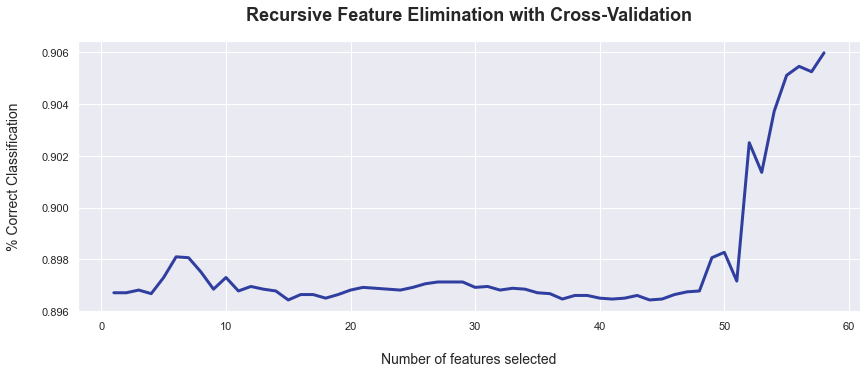

In [197]:
plt.figure(figsize=(14, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

It is visible that with 7-8 features the accuracy was about ~90%, which certainly isn’t terrible for the amount of prep work we’ve done. but here the accuracy increases heavily as we increase the number of features - could lead to overfitting of the model - (Overfiting to be explained later)

**What can be done here** - currently we will go with our manual method

In [203]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [204]:
# automatically choose the number of features
rfecv = RFECV(estimator=clf,step=1, cv=StratifiedKFold(5))

In [205]:
start = time.time()

rfecv.fit(X_train, y_train) #Considering the main datasets

end = time.time()
print("Total Time taken is",(end - start)/60,"minutes")

Total Time taken is 0.6162588357925415 minutes


In [206]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


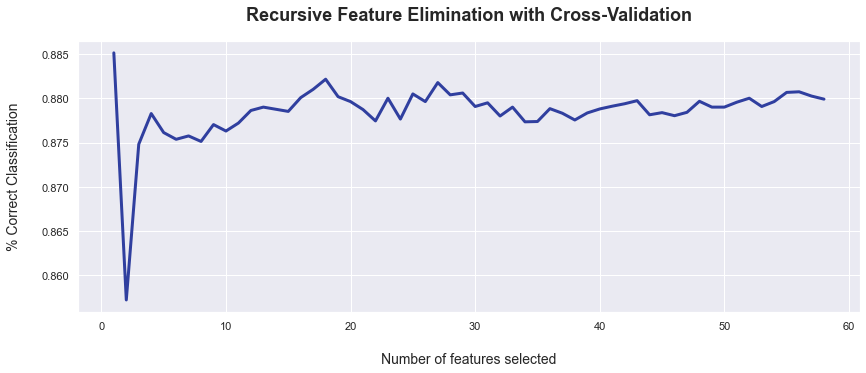

In [207]:
plt.figure(figsize=(14, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [209]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [210]:
rf = RandomForestClassifier()
# automatically choose the number of features
rfecv = RFECV(estimator=rf,step=1, cv=StratifiedKFold(5))

In [211]:
start = time.time()

rfecv.fit(X_train, y_train) #Considering the main datasets

end = time.time()
print("Total Time taken is",(end - start)/60,"minutes")

Total Time taken is 10.294653065999348 minutes


In [218]:
pd.set_option('display.max_rows', 500)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfecv.support_,
                                     'Ranking':rfecv.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
0,age,True,1
56,poutcome_nonexistent,True,1
29,default_no,True,1
32,housing_no,True,1
34,housing_yes,True,1
35,loan_no,True,1
37,loan_yes,True,1
38,contact_cellular,True,1
39,contact_telephone,True,1
40,month_apr,True,1


In [212]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 43


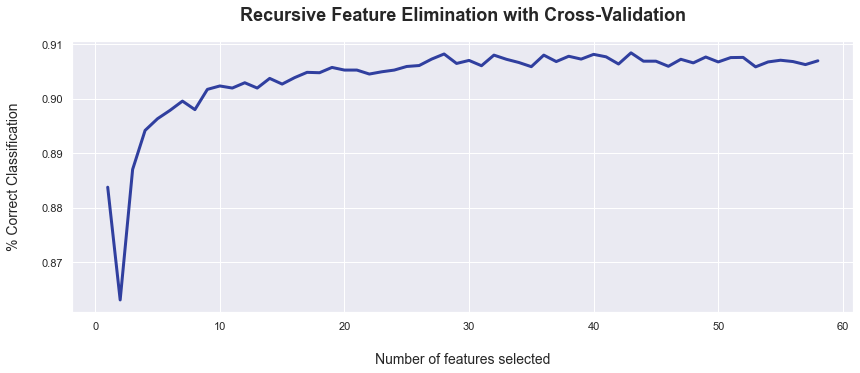

In [213]:
plt.figure(figsize=(14, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [219]:
imp_rfecv = ['age','poutcome_nonexistent','default_no','housing_no','housing_yes','loan_no','loan_yes','contact_cellular',
 'contact_telephone','month_apr','month_aug','education_university.degree','month_jul','month_mar','month_may',
 'month_nov','month_oct','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed',
 'poutcome_failure','month_jun','education_professional.course','education_unknown','education_high.school','duration',
 'campaign','previous','emp_var_rate','job_admin.','job_blue-collar','job_management','job_retired','job_services',
 'job_technician','poutcome_success','education_basic.9y','education_basic.4y','marital_married','marital_single',
'marital_divorced']

In [217]:
len(rfecv.estimator_.feature_importances_) 

43

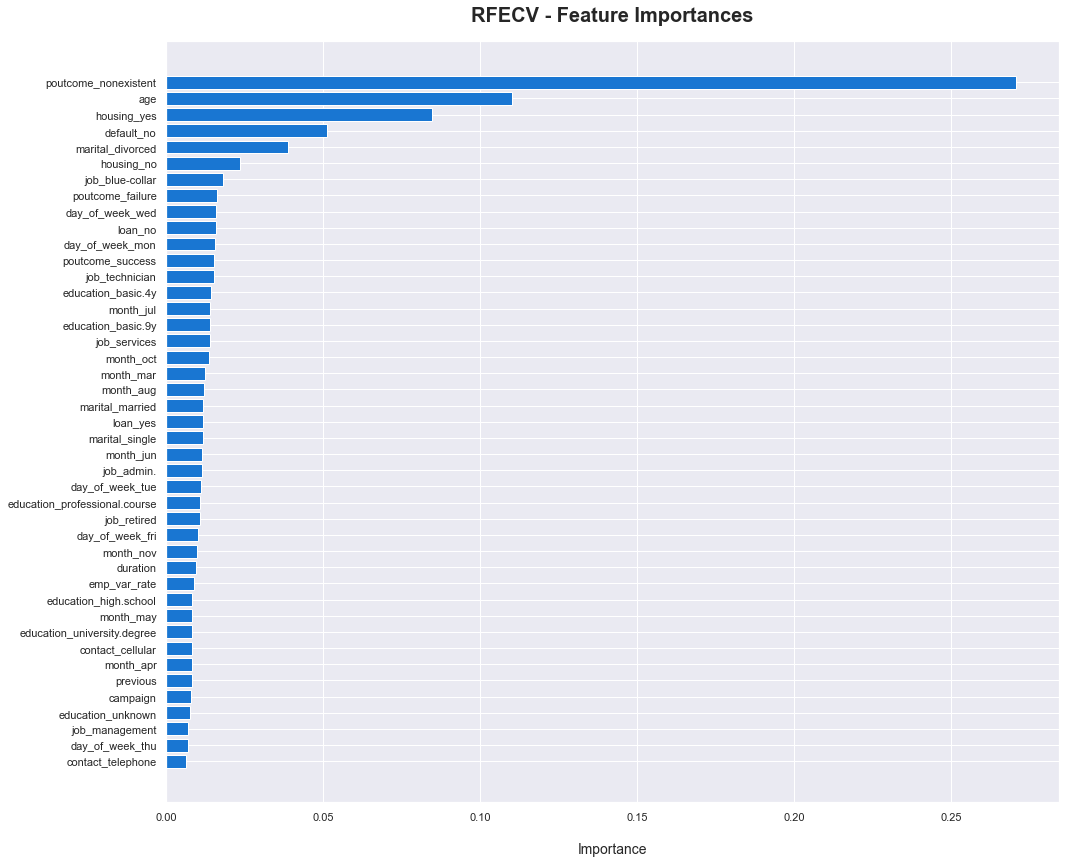

In [222]:
dset = pd.DataFrame()
dset['attr'] = X_train[imp_rfecv].columns.values.tolist()
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width= dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

We can keep doing this for other methods - but let us stick to our manual method to proceed with our final model

**Feature Selection Methods -**
https://medium.com/analytics-vidhya/feature-selection-methods-for-data-science-just-a-few-fca3086eb445
https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
https://towardsdatascience.com/feature-selection-why-how-explained-part-2-352d9130c2e1

# Final Model Run - Stats Models

In [237]:
# Selecting the features
cols=['month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','education_basic.9y',
      'previous','job_entrepreneur','job_housemaid','job_unemployed','emp_var_rate','job_management',
      'job_blue-collar','job_self-employed','job_admin.','job_services','day_of_week_wed',
      'job_technician','poutcome_failure']  
X = X_train[cols]
y = y_train['y']

In [239]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.283034
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.195     
Dependent Variable:   y                 AIC:               16363.7836
Date:                 2021-01-28 10:27  BIC:               16562.2378
No. Observations:     28823             Log-Likelihood:    -8157.9   
Df Model:             23                LL-Null:           -10136.   
Df Residuals:         28799             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
month_nov            -0.6825   0.0768  -8.8858 0.0000 -0.8330 -0.5319
month_may       

## Logistic Regression - Results Interpretation

* Null Deviance = 2(LL(Saturated Model) - LL(Null Model)) on df = df_Sat - df_Null
* Residual Deviance = 2(LL(Saturated Model) - LL(Proposed Model)) df = df_Sat - df_Proposed

* The Saturated Model is a model that assumes each data point has its own parameters (which means you have n parameters to estimate.)

* The Null Model assumes the exact "opposite", in that is assumes one parameter for all of the data points.

* The Proposed Model assumes you can explain your data points with p parameters + an intercept term, so you have p+1 parameters.


* **Note**- In case of logistic regression R2 doesn’t lead to us any information, instead heuristically we can use pseudo-R2 (also known as McFadden's pseudo-R squared) to test goodness of fit.

**𝒑𝒔𝒆𝒖𝒅𝒐 𝑹𝟐=𝟏−(𝑳𝑳(𝑭𝒊𝒕𝒕𝒆𝒅 𝑴𝒐𝒅𝒆𝒍))/(𝑳𝑳(𝑵𝒖𝒍𝒍 𝑴𝒐𝒅𝒆𝒍))**

* **Coefficients** - These are the binary logit regression estimates for the Parameters in the model. The logistic regression model models the log odds of a positive response (probability modeled is Y =1) as a linear combination the predictor variables. This is written as 

**log[p/(1-p)] = b0 + b1*x1 + b2*x2 + b3 *x3 + …., where p is the probability that Y is 1**

**We can interpret the parameter estimates as follows: for a one unit change in the predictor variable, the difference in log-odds for a positive outcome is expected to change by the respective coefficient, given the other variables in the model are held constant**

* **Standard Error** - These are the standard errors of the individual regression coefficients. They are used in the 95% Confidence Limits

* **Z value and Pr (> |z|)** - These are the test statistics and p-values, respectively, testing the null hypothesis that an individual predictor's regression coefficient is zero, given the other predictor variables are in the model

    * Why z-test not t-test?? - This is because when we are comparing means, there are two sources of randomness, whereas when we are comparing proportions, there is just one.

        In OLS, the response variable will have a mean  μ  and a variance  σ2 . The test statistic will be a function of means over variances, both of which we have to estimate. The numerator will be normally distributed, but the denominator will vary independently of the normal. The numerator will be normally distributed while the denominator will be a function of a Chi-Squared distribution. which means that the t-distribution (and t-test) must come into play.

        Note that in logistic regression, the response variable will be distributed distributed Y∼Bern(p) which has mean  p  and variance  p(1−p) . The denominator will no longer vary independently of the numerator. The randomness in both will come from the same source of p, so the normal distribution will suffice here and we can just use a z-test.

https://www.quora.com/In-Stata-and-R-output-why-is-z-test-other-than-t-test-used-in-logistic-regression-to-assess-the-significance-of-the-individual-variables

* **p-value** - Low p-value (<0.05) for a variable indicates that the variable is significant

* **AIC** - This is the Akaike Information Criterion. It is calculated as AIC = -2 Log L + 2((k-1) + s), where **k** is the number of levels of the dependent variable and **s** is the number of predictors in the model. AIC is used for the comparison of nonnested models on the same sample. Ultimately, the model with the smallest AIC is considered the best, although the AIC value itself is not meaningful
    
* **SC** - This is the Schwarz Criterion. It is defined as - 2 Log L + ((k-1) + s)*log(Σ fi), where fi's are the frequency values of the ith observation, and k and s were defined previously. Like AIC, SC penalizes for the number of predictors in the model and the smallest SC is most desirable and the value itself is not meaningful

    * Akaike Information Criterion (AIC) and Schwarz Criterion (SC) penalize for number of predictors and can be used to compare different models. The models with smaller values are better

* **Log Likelihood** - This is deviance statistic. The lower, the better

## Model Predictions

In [240]:
cols=['month_nov','month_may','month_mar','month_jun','day_of_week_mon','month_aug',
      'month_apr','contact_telephone','default_unknown','poutcome_nonexistent','education_basic.9y',
      'previous','job_entrepreneur','job_housemaid','job_unemployed','emp_var_rate','job_management',
      'job_blue-collar','job_self-employed','job_admin.','job_services','day_of_week_wed',
      'job_technician','poutcome_failure']  
X_test_rfe = X_test[cols]
y_test_rfe = y_test['y']

In [241]:
X_test_rfe.columns

Index(['month_nov', 'month_may', 'month_mar', 'month_jun', 'day_of_week_mon',
       'month_aug', 'month_apr', 'contact_telephone', 'default_unknown',
       'poutcome_nonexistent', 'education_basic.9y', 'previous',
       'job_entrepreneur', 'job_housemaid', 'job_unemployed', 'emp_var_rate',
       'job_management', 'job_blue-collar', 'job_self-employed', 'job_admin.',
       'job_services', 'day_of_week_wed', 'job_technician',
       'poutcome_failure'],
      dtype='object')

In [246]:
y_pred_rfe = result.predict(X_test_rfe)

In [247]:
y_pred_rfe.to_frame().head()

,0
7402,0.017745
29278,0.124474
11551,0.115748
13632,0.025795
7017,0.038125


## Save the model

In [248]:
import pickle

In [249]:
# save the model to disk
logistic_Reg_Model = 'result.sav'
pickle.dump(result, open(logistic_Reg_Model, 'wb'))

In [201]:
# load the model from disk
logistic_Reg_Model_load = pickle.load(open(logistic_Reg_Model, 'rb'))

# Model Fitting - Sklearn Method

In [337]:
log_sklearn = LogisticRegression(random_state=1)

In [338]:
log_sklearn.fit(X, y)

LogisticRegression(random_state=1)

In [339]:
print("X train shape",X.shape)
print("X test rfe shape",X_test_rfe.shape)
print("y train shape",y.shape)
print("y test rfe shape",y_test_rfe.shape)

X train shape (28823, 24)
X test rfe shape (12353, 24)
y train shape (28823,)
y test rfe shape (12353,)


In [340]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log_sklearn.score(X, y)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_sklearn.score(X_test_rfe, y_test_rfe)))

Accuracy of logistic regression classifier on train set: 0.90
Accuracy of logistic regression classifier on test set: 0.90


In [341]:
start = time.time()

ytrain_predict = log_sklearn.predict(X)
ytest_predict = log_sklearn.predict(X_test_rfe)

end = time.time()
print("Total Time taken is",(end - start),"seconds")

Total Time taken is 0.011007070541381836 seconds


In [342]:
print("y train predict shape",ytrain_predict.shape)
print("y test rfe predict shape",ytest_predict.shape)

y train predict shape (28823,)
y test rfe predict shape (12353,)


# Model performance Measures

## 1. Confusion Matrix

In [343]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

### Training Data

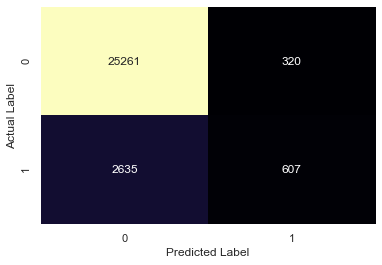

In [344]:
# Let us check how well our model is predicting 1's and 0's 
# plot_confusion_matrix(log_sklearn,X,y)
sns.heatmap(confusion_matrix(y,ytrain_predict),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [345]:
print(classification_report(y, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     25581
           1       0.65      0.19      0.29      3242

    accuracy                           0.90     28823
   macro avg       0.78      0.59      0.62     28823
weighted avg       0.88      0.90      0.87     28823



# **Classification Table** - True Positive, False Positive, True Negative, False Negative

**Accuracy = (TP + TN) / Total**

**Error rate: 1 – Accuracy**

* **True Positive-** 1's which are actually predicted as 1's
* **True Negative-** 0's which are actually predicted as 0's
* **False Positive-** 0's which are actually predicted as 1's
* **False Negative-** 1's which are actually predicted as 0's

**Precision** - Predictive Positive Rate - Out of total predicted how many we have predicted correctly - TP/(TP+FP). What is the Precision for our model? Yes, it is 100% or, when it predicts that a flight will be delayed, it is correct all the time.

**Recall** - The recall is the measure of our model correctly identifying True Positives - TP/(TP+FN). Out of total actual 1's how many we predicted correctly. In our model recall is also 100% which means Flights who got actually delayed, It identifies them correctly

Note - Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate

Sensitivity is the probability that a test will indicate ‘Y=1' among those with the Y=1:

**True Positive Rate or Sensitivity or Recall:** TP / (TP+FN) (Acutal Y=1)

**False Positive Rate or 1-Specificity:** FP (Predicted 1 & Actual 0)/(TN+FP) (Acutal Y=0)

Specificity- Out of actual 0's how many are predicted 0's 

1-Specificity or False Positive Rate- Actual 0's but predicted as 1's (Proportion of negative class predicted as 1)

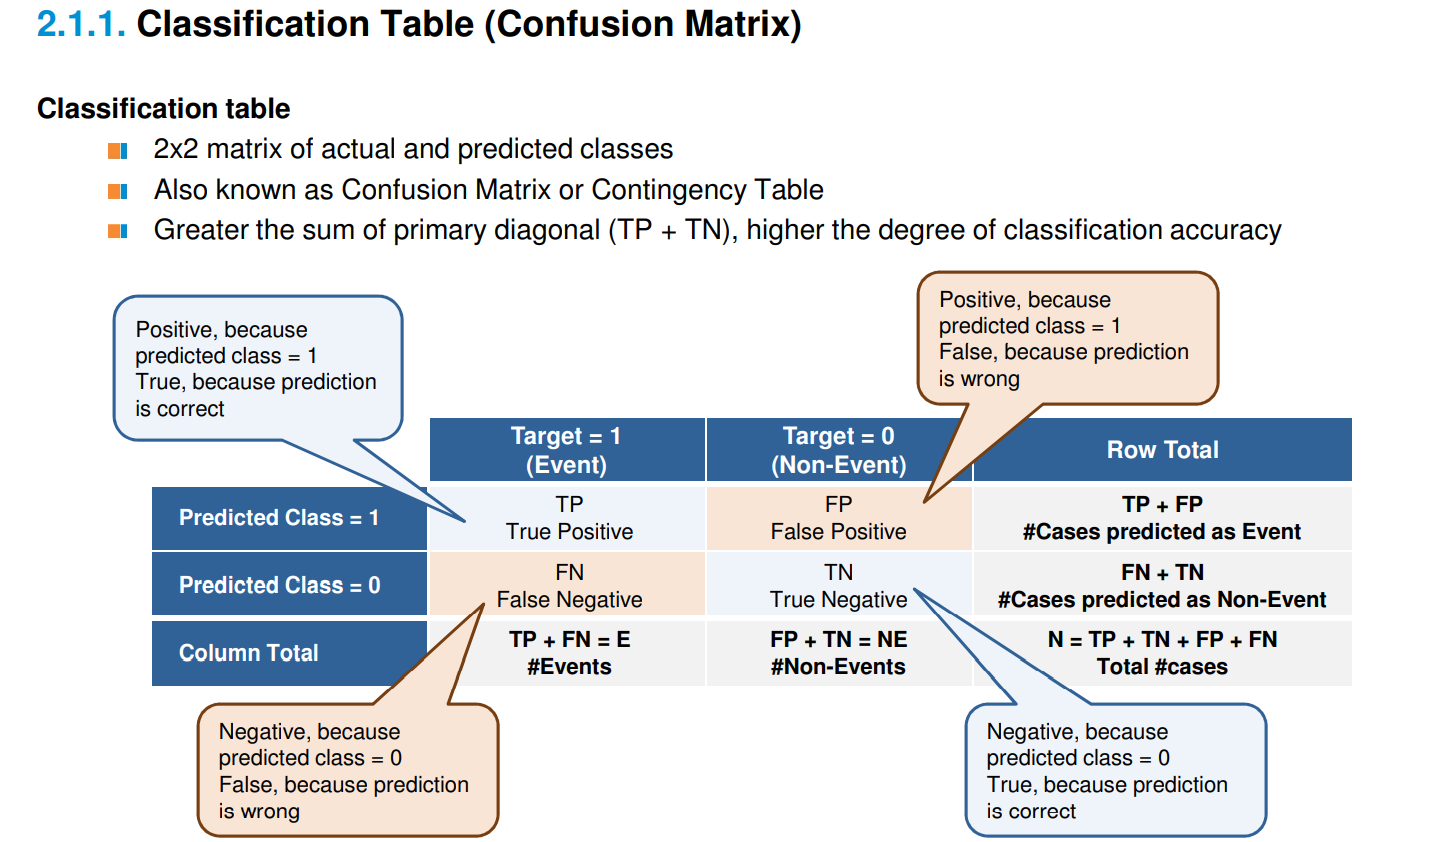

In [346]:
from IPython.display import Image
Image(filename='Classification_Table.png') 

## 2. ROC-AUC Curve

In [347]:
from sklearn.metrics import roc_curve,roc_auc_score

### Training Data

In [348]:
ytrain_predict_prob =  pd.DataFrame(log_sklearn.predict_proba(X))
ytrain_predict_prob.head()

,0,1
0,0.781551,0.218449
1,0.933194,0.066806
2,0.926203,0.073797
3,0.964985,0.035015
4,0.947659,0.052341


In [419]:
# TPR & FPR at 50% threshold
print("TPR-",607/(607+2635))
print("FPR-",320/(320+25361))

TPR- 0.18723010487353486
FPR- 0.012460573965188272


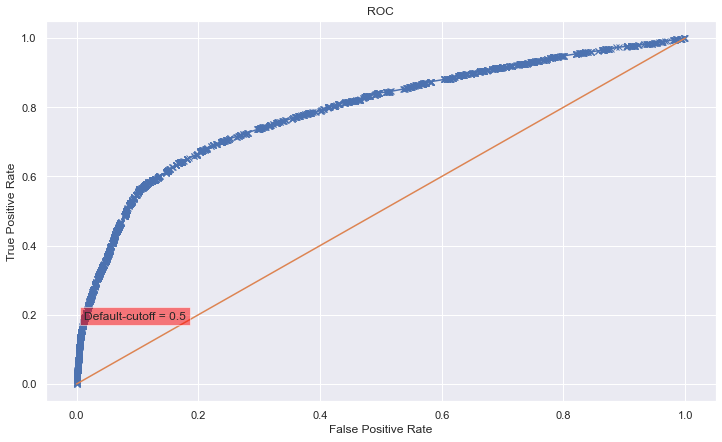

Area under Curve is 0.7898353130737045


In [420]:
fpr,tpr,threshold = roc_curve(y,log_sklearn.predict_proba(X)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on Training Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.012460573965188272,0.18723010487353486, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y,log_sklearn.predict_proba(X)[:,1]))

### Test Data

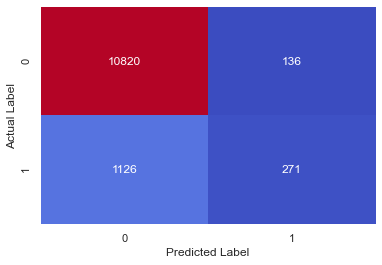

In [323]:
# Let us check how well our model is predicting 1's and 0's 
sns.heatmap(confusion_matrix(y_test_rfe,ytest_predict),annot=True,fmt='d',cbar=False,cmap='coolwarm')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [322]:
print(classification_report(y_test_rfe,ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10956
           1       0.67      0.19      0.30      1397

    accuracy                           0.90     12353
   macro avg       0.79      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



In [421]:
# TPR & FPR at 50% threshold
print("TPR-",271/(271+1126))
print("FPR-",136/(136+10820))

TPR- 0.19398711524695778
FPR- 0.012413289521723256


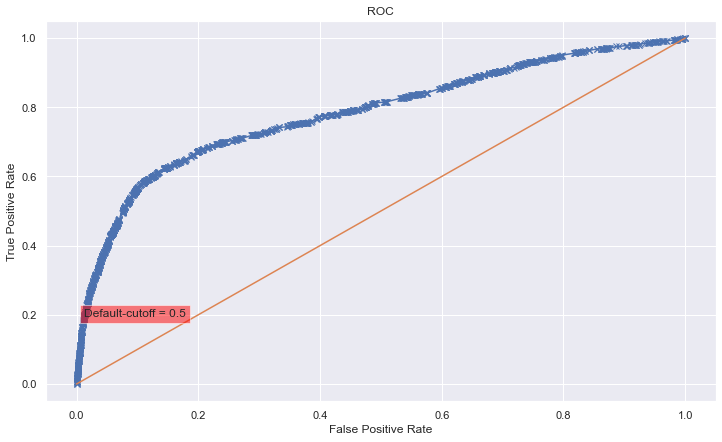

Area under Curve is 0.7835063818755206


In [422]:
fpr,tpr,threshold = roc_curve(y_test_rfe,log_sklearn.predict_proba(X_test_rfe)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on Test Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.012413289521723256,0.19398711524695778, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_rfe,log_sklearn.predict_proba(X_test_rfe)[:,1]))

* A value below 0.5 indicates a very poor model.
* A value of 0.5 means that the model is no better than predicting an outcome than random chance.
* Values over 0.7 indicate a good model.
* Values over 0.8 indicate a strong model.
* A value of 1 means that the model perfectly predicts those group members who will experience a certain outcome and those who will not

# **Limitations of ROC Curve**

* Should not be used if there is a data imbalance (Refer to the theory part)
* Should not be used if we are interested in prediction or accruacy of only 1 class

# Precision - Recall tradeoff

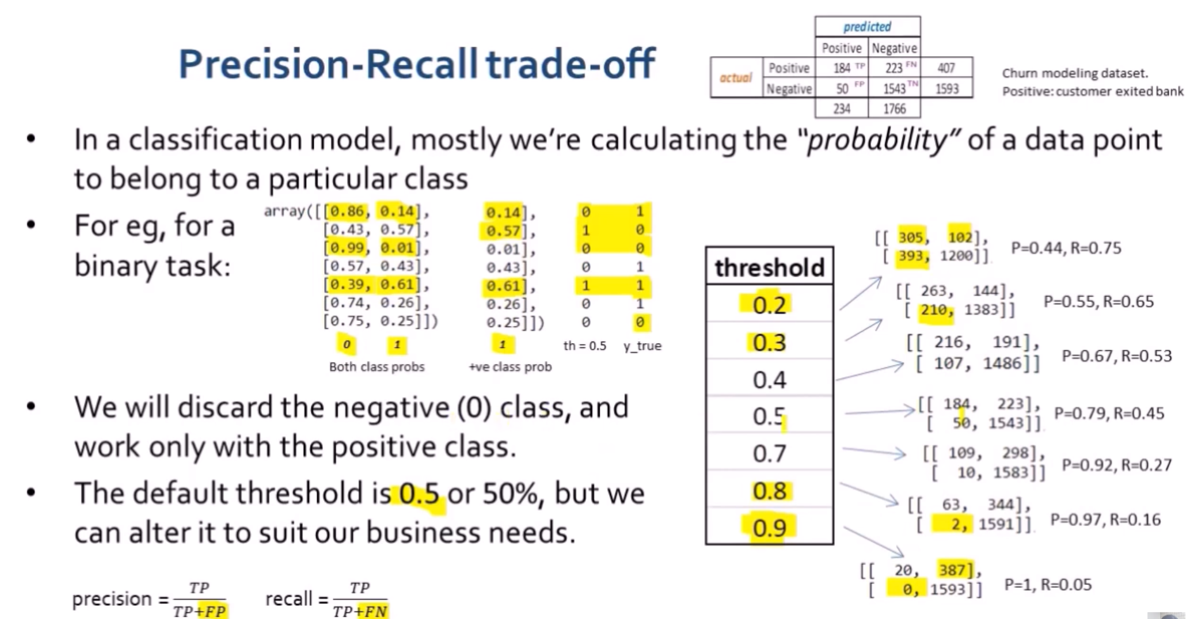

In [287]:
from IPython.display import Image
Image(filename='Precision_Recall_Tradeoff.png') 

# Optimal Cutoff

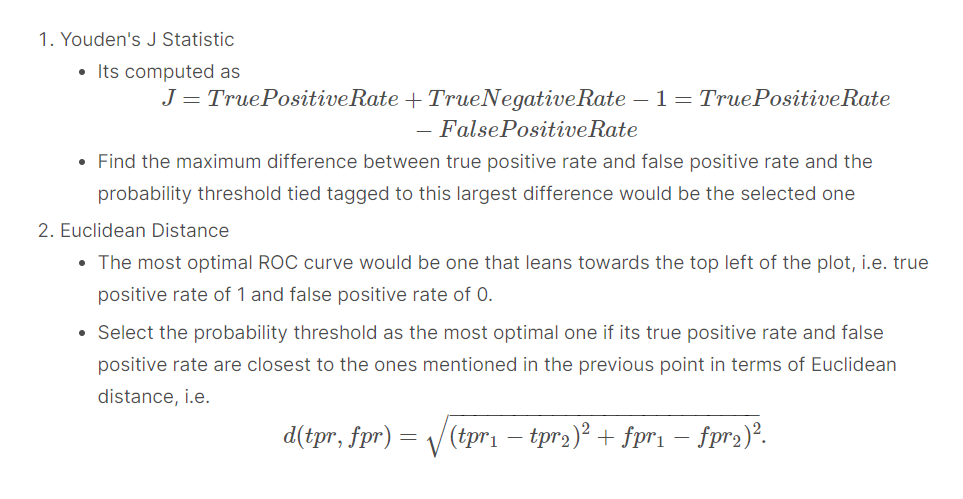

In [364]:
Image(filename='Optimal_cutoff_Measures.png') 

Youden's J statistic to obtain the optimal probability threshold and this method gives equal weights to both false positives and false negatives.

In [354]:
optimal_cutoff = sorted(list(zip(np.abs(tpr - fpr), threshold)), key=lambda i: i[0], reverse=True)[0][1]
print("Optimal Probability Cutoff- ",optimal_cutoff)

Optimal Probability Cutoff-  0.13268728880593933


In [355]:
roc_opt_pred_test = [1 if i >= optimal_cutoff else 0 for i in log_sklearn.predict_proba(X_test_rfe)[:, -1]]
roc_opt_pred_test[:5]

[0, 0, 0, 0, 0]

In [356]:
y_predict_opt_cutoff_test = pd.Series(roc_opt_pred_test, name='Predicted')

### Confusion Matrix - Post Optimal Cutoff - Test Data

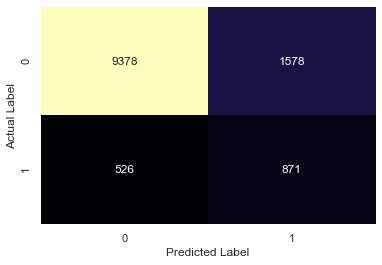

In [358]:
sns.heatmap(confusion_matrix(y_test_rfe, y_predict_opt_cutoff_test ),annot=True, fmt='d',cbar=False, cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

False positives have increased since we have reduced the cutoff - recall went up but precision went down

In [360]:
print(classification_report(y_test_rfe,y_predict_opt_cutoff_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     10956
           1       0.36      0.62      0.45      1397

    accuracy                           0.83     12353
   macro avg       0.65      0.74      0.68     12353
weighted avg       0.88      0.83      0.85     12353



In [423]:
# TPR & FPR at 13% optimal threshold
print("TPR-",871/(871+526))
print("FPR-",1578/(1578+9378))

TPR- 0.623478883321403
FPR- 0.14403066812705367


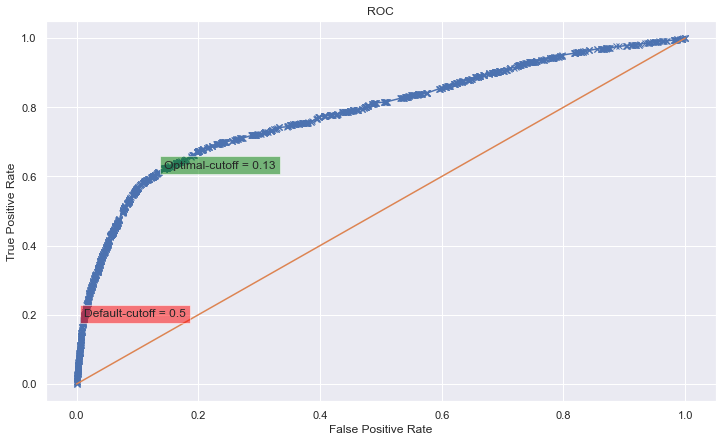

Area under Curve is 0.7835063818755206


In [426]:
fpr,tpr,threshold = roc_curve(y_test_rfe,log_sklearn.predict_proba(X_test_rfe)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on Test Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.012413289521723256,0.19398711524695778, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
opt_cutoff = 0.13
plt.text(0.14403066812705367,0.623478883321403,  f"Optimal-cutoff = {opt_cutoff}", bbox={'facecolor': 'green','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_rfe,log_sklearn.predict_proba(X_test_rfe)[:,1]))

# What Metric to choose when

* **Imbalanced Class Problem** - When one category representing the overwhelming majority of the data points 

* **Why not accuracy** -
Imbalanced classification problem occurs in disease detection when the rate of the disease in the public is very low. In these kind of these cases the positive class — disease — is greatly outnumbered by the negative class. These types of problems are examples of the fairly common case in data science when accuracy is not a good measure for assessing model performance.

Intuitively, we know that proclaiming all data points as negative in the desease detection problem is not helpful and, instead, we should focus on identifying the positive cases - The metric our intuition tells us we should maximize is known in statistics as **recall**, or the ability of a model to find all the relevant cases within a dataset

In the Desease case, true positives are correctly identified patients, and false negatives would be individuals, the model labels as not deseased that actually were deseased

* **Tradeoff** -
In the case of recall, when we increase the recall, we decrease the precision.Again, we intuitively know that a model that labels 100% of people as patients is probably not useful because we would then have to ban every single person from roaming/business. 

Statistics provides us with the vocabulary to express our intuition: this new model would suffer from low precision, or the ability of a classification model to identify only the relevant data points 

False positives are cases the model incorrectly labels as positive that are actually negative, or in our example, individuals the model classifies as patients that are not

* **Note** - While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

* **F1 Score** - See example 

# Parameter Tuning in Logistic Regression - Grid Search CV

In [437]:
from sklearn.model_selection import GridSearchCV

In [438]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [439]:
log_gridsearchcv = LogisticRegression(max_iter=10000,n_jobs=2)

**C- Parameter - Regularization **
For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data

**penality** Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied

**Tolerance** for stopping criteria for the loss function

**Solver** - Gradient Descent algorithm

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

In [440]:
grid_search = GridSearchCV(estimator = log_gridsearchcv, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [441]:
start = time.time()

grid_search.fit(X, y)

end = time.time()
print("Total Time taken is ",(end - start)/60, "minutes")

Total Time taken is  0.10822403033574422 minutes


In [442]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [443]:
best_model = grid_search.best_estimator_

In [444]:
# Prediction on the training & test set
start = time.time()

ytrain_predict_grdcv = best_model.predict(X)
ytest_predict_grdcv = best_model.predict(X_test_rfe)

end = time.time()
print("Total Time taken is ",(end - start)/60, "minutes")

Total Time taken is  0.00029987494150797526 minutes


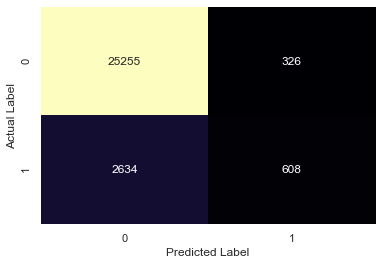

In [447]:
## Confusion matrix on the training data
sns.heatmap(confusion_matrix(y,ytrain_predict_grdcv),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [448]:
print(classification_report(y, ytrain_predict_grdcv),'\n')

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     25581
           1       0.65      0.19      0.29      3242

    accuracy                           0.90     28823
   macro avg       0.78      0.59      0.62     28823
weighted avg       0.88      0.90      0.87     28823
 



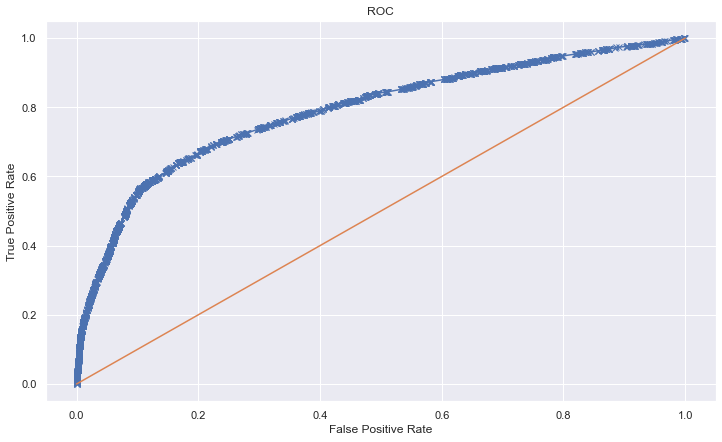

Area under Curve is 0.7898053614022456


In [452]:
fpr,tpr,threshold = roc_curve(y,best_model.predict_proba(X)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on training Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# cutoff = 0.5
# plt.text(0.18447285094406005,0.6550564872366209, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y,best_model.predict_proba(X)[:,1]))

### Test Data

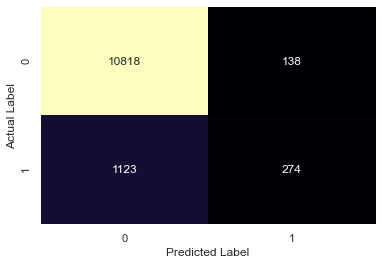

In [449]:
## Confusion matrix on the training data
sns.heatmap(confusion_matrix(y_test_rfe,ytest_predict_grdcv),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [451]:
print(classification_report(y_test_rfe, ytest_predict_grdcv),'\n')

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10956
           1       0.67      0.20      0.30      1397

    accuracy                           0.90     12353
   macro avg       0.79      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353
 



You can select other parameters to perform GridSearchCV and try optimize the desired parameter.

# Class Imbalance Problem

In [368]:
data['y'].value_counts(normalize=True)

0    0.887337
1    0.112663
Name: y, dtype: float64

**~11% Event rate in our dataset **

## Oversampling and Undersampling Techniques

In [369]:
import imblearn
print(imblearn.__version__)

0.7.0


### Random Oversampling

In [370]:
from imblearn.over_sampling import RandomOverSampler

In [371]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority',random_state=1)

This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1,000 examples.

In [372]:
# define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy=0.5)

This would ensure that the minority class was oversampled to have half the number of examples as the majority class, for binary classification problems. This means that if the majority class had 1,000 examples and the minority class had 100, the transformed dataset would have 500 examples of the minority class.

In [373]:
# fit and apply the transform
X_train_over,y_train_over = oversample.fit_resample(X, y)

In [374]:
print('X_train data shape', X.shape)
print('X_train_over data shape', X_train_over.shape)

print('y train data shape', y.shape)
print('y train over data shape', y_train_over.shape)

X_train data shape (28823, 24)
X_train_over data shape (51162, 24)
y train data shape (28823,)
y train over data shape (51162,)


In [375]:
print('X test rfe data shape', X_test_rfe.shape)
print('y test rfe data shape', y_test_rfe.shape)

X test rfe data shape (12353, 24)
y test rfe data shape (12353,)


In [376]:
from collections import Counter

In [377]:
# summarize class distribution
print(Counter(y))
print(Counter(y_train_over))

Counter({0: 25581, 1: 3242})
Counter({0: 25581, 1: 25581})


In [380]:
log_reg_over = LogisticRegression(random_state=1)
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

In [382]:
y_train_over_pred = log_reg_over.predict(X_train_over)

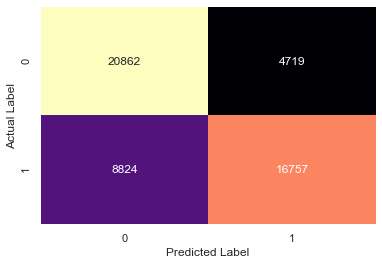

In [383]:
# Let us check how well our model is predicting 1's and 0's 
sns.heatmap(confusion_matrix(y_train_over,y_train_over_pred),annot=True,fmt='d',cbar=False,cmap='magma')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [384]:
print(classification_report(y_train_over,y_train_over_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75     25581
           1       0.78      0.66      0.71     25581

    accuracy                           0.74     51162
   macro avg       0.74      0.74      0.73     51162
weighted avg       0.74      0.74      0.73     51162



In [427]:
# TPR & FPR at 13% optimal threshold
print("TPR-",16757/(16757+8824))
print("FPR-",4719/(4719+20862)) # 1-precision

TPR- 0.6550564872366209
FPR- 0.18447285094406005


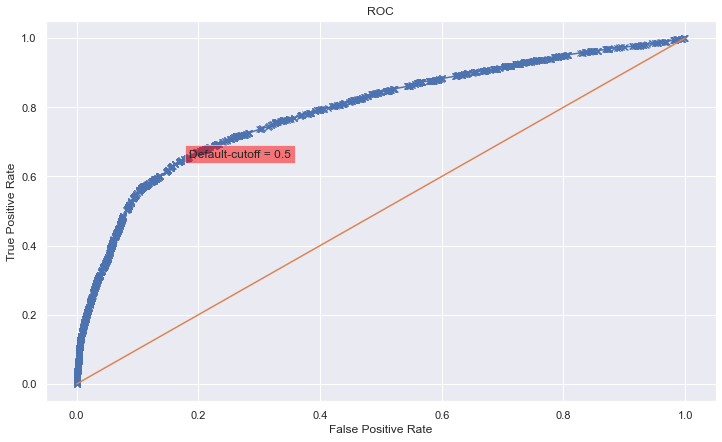

Area under Curve is 0.7902555218344074


In [428]:
fpr,tpr,threshold = roc_curve(y_train_over,log_reg_over.predict_proba(X_train_over)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on Test Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.18447285094406005,0.6550564872366209, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train_over,log_reg_over.predict_proba(X_train_over)[:,1]))

In [388]:
#we do not change anything on the test data
y_test_over_pred = log_reg_over.predict(X_test_rfe)

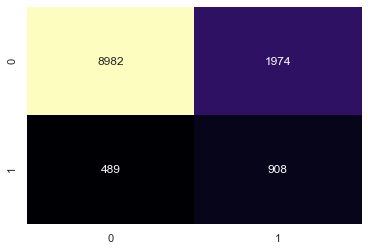

In [389]:
sns.heatmap(confusion_matrix(y_test_rfe,y_test_over_pred),annot=True,fmt='d',cbar=False,cmap='magma')

In [390]:
print(classification_report(y_test_rfe,y_test_over_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10956
           1       0.32      0.65      0.42      1397

    accuracy                           0.80     12353
   macro avg       0.63      0.73      0.65     12353
weighted avg       0.88      0.80      0.83     12353



In [429]:
# TPR & FPR at 13% optimal threshold
print("TPR-",908/(908+489))
print("FPR-",1974/(1974+8982)) # 1-precision

TPR- 0.6499642090193272
FPR- 0.1801752464403067


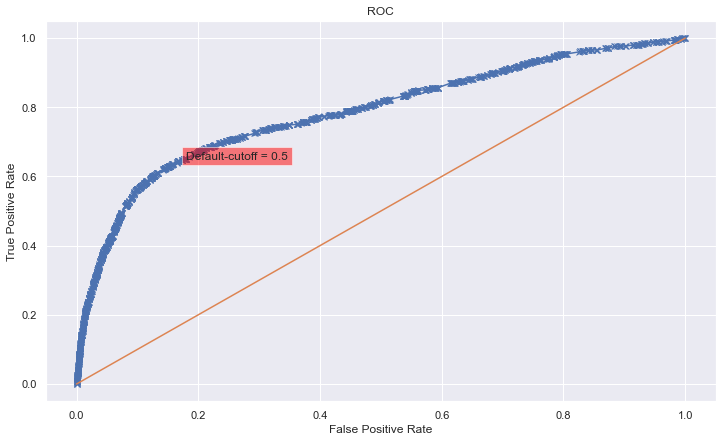

Area under Curve is 0.7845555450147045


In [430]:
fpr,tpr,threshold = roc_curve(y_test_rfe,log_reg_over.predict_proba(X_test_rfe)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Logistic Regression fit on Test Data')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.text(0.1801752464403067,0.6499642090193272, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_rfe,log_reg_over.predict_proba(X_test_rfe)[:,1]))

Model is doing a better job in predicting class 1 on training data but not test data

In [402]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log_reg_over.score(X_train_over, y_train_over)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_over.score(X_test_rfe, y_test_rfe)))

Accuracy of logistic regression classifier on train set: 0.74
Accuracy of logistic regression classifier on test set: 0.80


### Random Forest Classifier - for test purpose

In [393]:
rfc1_over = RandomForestClassifier(n_estimators=100,random_state=1)
rfc1_over

RandomForestClassifier(random_state=1)

In [394]:
start = time.time()

rfc1_over.fit(X_train_over,y_train_over)

end = time.time()
print("Total Time taken is ",(end - start), "seconds")

Total Time taken is  2.5238540172576904 seconds


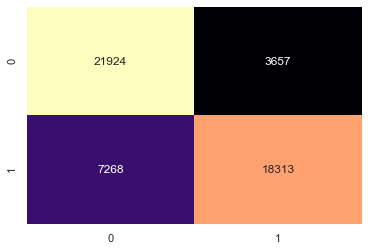

In [396]:
y_pred_train_rfc1 = rfc1_over.predict(X_train_over)
sns.heatmap(confusion_matrix(y_train_over,y_pred_train_rfc1),annot=True,fmt='d',cbar=False,cmap='magma')

In [397]:
print(classification_report(y_train_over,y_pred_train_rfc1))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80     25581
           1       0.83      0.72      0.77     25581

    accuracy                           0.79     51162
   macro avg       0.79      0.79      0.79     51162
weighted avg       0.79      0.79      0.79     51162



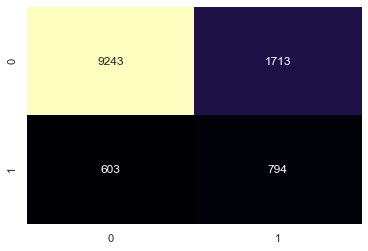

In [399]:
#we do not change anything on the test data
y_test_over_pred_rfc1 = rfc1_over.predict(X_test_rfe)
sns.heatmap(confusion_matrix(y_test_rfe,y_test_over_pred_rfc1),annot=True,fmt='d',cbar=False,cmap='magma')

In [400]:
print(classification_report(y_test_rfe,y_test_over_pred_rfc1))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10956
           1       0.32      0.57      0.41      1397

    accuracy                           0.81     12353
   macro avg       0.63      0.71      0.65     12353
weighted avg       0.87      0.81      0.83     12353



In [401]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(rfc1_over.score(X_train_over, y_train_over)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rfc1_over.score(X_test_rfe, y_test_rfe)))

Accuracy of logistic regression classifier on train set: 0.79
Accuracy of logistic regression classifier on test set: 0.81


### Random Undersampling

In [403]:
from imblearn.under_sampling import RandomUnderSampler

In [404]:
# undersample = RandomUnderSampler(sampling_strategy='majority',random_state=1)

For example, a dataset with 1,000 examples in the majority class and 100 examples in the minority class will be undersampled such that both classes would have 100 examples in the transformed training dataset.

In [405]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

We can also set the sampling_strategy argument to a floating point value which will be a percentage relative to the minority class, specifically the number of examples in the minority class divided by the number of examples in the majority class. For example, if we set sampling_strategy to 0.5 in an imbalanced data dataset with 1,000 examples in the majority class and 100 examples in the minority class, then there would be 200 examples for the majority class in the transformed dataset (or 100/200 = 0.5).

This might be preferred to ensure that the resulting dataset is both large enough to fit a reasonable model, and that not too much useful information from the majority class is discarded.

In [407]:
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [408]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_under,y_train_under)

LogisticRegression(random_state=1)

In [409]:
y_train_pred_log_under = log_reg_under.predict(X_train_under)

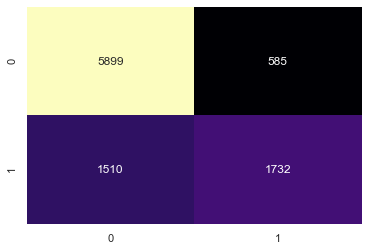

In [410]:
sns.heatmap(confusion_matrix(y_train_under,y_train_pred_log_under),annot=True,fmt='d',cbar=False,cmap='magma')

In [411]:
print(classification_report(y_train_under,y_train_pred_log_under))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6484
           1       0.75      0.53      0.62      3242

    accuracy                           0.78      9726
   macro avg       0.77      0.72      0.74      9726
weighted avg       0.78      0.78      0.77      9726



In [412]:
y_test_pred_log_under = log_reg_under.predict(X_test_rfe)

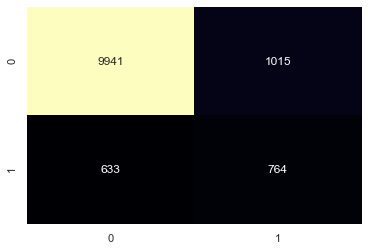

In [414]:
sns.heatmap(confusion_matrix(y_test_rfe,y_test_pred_log_under),annot=True,fmt='d',cbar=False,cmap='magma')

In [415]:
print(classification_report(y_test_rfe,y_test_pred_log_under))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10956
           1       0.43      0.55      0.48      1397

    accuracy                           0.87     12353
   macro avg       0.68      0.73      0.70     12353
weighted avg       0.88      0.87      0.87     12353



Undersampling performing little better than oversampling technique

But still there is huge scope to improve the model - by including some of the X variables in the model

# Overfitting and Underfitting With Machine Learning Algorithms

**Generalization-**

**Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning.**

The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows us to make predictions in the future on data the model has never seen.

There is a terminology used in machine learning when we talk about how well a machine learning model learns and generalizes to new data, namely overfitting and underfitting.

**Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms.**

**Statistical Fit-** Residual Errors,Linear Regression fits etc.If we knew the form of the target function, we would use it directly to make predictions, rather than trying to learn an approximation from samples of noisy training data.

**Overfitting in Machine Learning-** 
Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up

**Underfitting in Machine Learning-**
Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting


**A Good Fit in Machine Learning-**
Ideally, you want to select a model at the sweet spot between underfitting and overfitting.This is the goal, but is very difficult to do in practice.

Over time, as the algorithm learns, the error for the model on the training data goes down and so does the error on the test dataset. If we train for too long, the performance on the training dataset may continue to decrease because the model is overfitting and learning the irrelevant detail and noise in the training dataset. At the same time the error for the test set starts to rise again as the model’s ability to generalize decreases.

**The sweet spot is the point just before the error on the test dataset starts to increase where the model has good skill on both the training dataset and the unseen test dataset**

Both overfitting and underfitting can lead to poor model performance. But by far the most common problem in applied machine learning is overfitting.

Overfitting is such a problem because the evaluation of machine learning algorithms on training data is different from the evaluation we actually care the most about, namely how well the algorithm performs on unseen data.

There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

* **Use a resampling technique to estimate model accuracy**
* **Hold back a validation dataset**

The most popular resampling technique is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.

Using cross validation is a gold standard in applied machine learning for estimating model accuracy on unseen data. If you have the data, using a validation dataset is also an excellent practice

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

# Manual Model - Base Estimator

https://ethen8181.github.io/machine-learning/model_selection/auc/auc.html

# Technical Questions on Logistic Regression

* 1.**How do we deal with overfitting in Logistic Regression?**
https://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php
* 2.**What is Cross Validation is Regression?**
* 3.**What is MLE algorithm in Logistic Regression?**
https://www.bogotobogo.com/python/scikit-learn/Maximum-Likelyhood-Estimation-MLE.php
* 4.**How MLE is different from OLS Method?**
* 5.**How scoring is performed in Logistic Regression**?
* 6.**What is the Loss function in logistic regression-Explain the log loss in detail**? 
* 7.**Why do'nt we choose y-yhat as a loss function in logistic regression?**
* 8.**Explain the logistic regression in gradient descent and mathematical form?**